In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [7]:
base = datasets.load_digits()

In [9]:
import pandas as pd

In [13]:
previsores = np.asarray(base.data, 'float32')
classe = base.target

In [16]:
norm = MinMaxScaler(feature_range=(0, 1))

In [17]:
previsores = norm.fit_transform(previsores)

In [20]:
pd.DataFrame(previsores).head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


In [21]:
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.2, random_state=0)

In [26]:
rbm = BernoulliRBM(random_state=0)
rbm.n_iter = 25
rbm.n_components = 50
naive_rbm = GaussianNB()
classificador_rbm = Pipeline(steps=[('rbm', rbm), ('naive', naive_rbm)])
classificador_rbm.fit(x_train, y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=25, random_state=0)),
                ('naive', GaussianNB())])

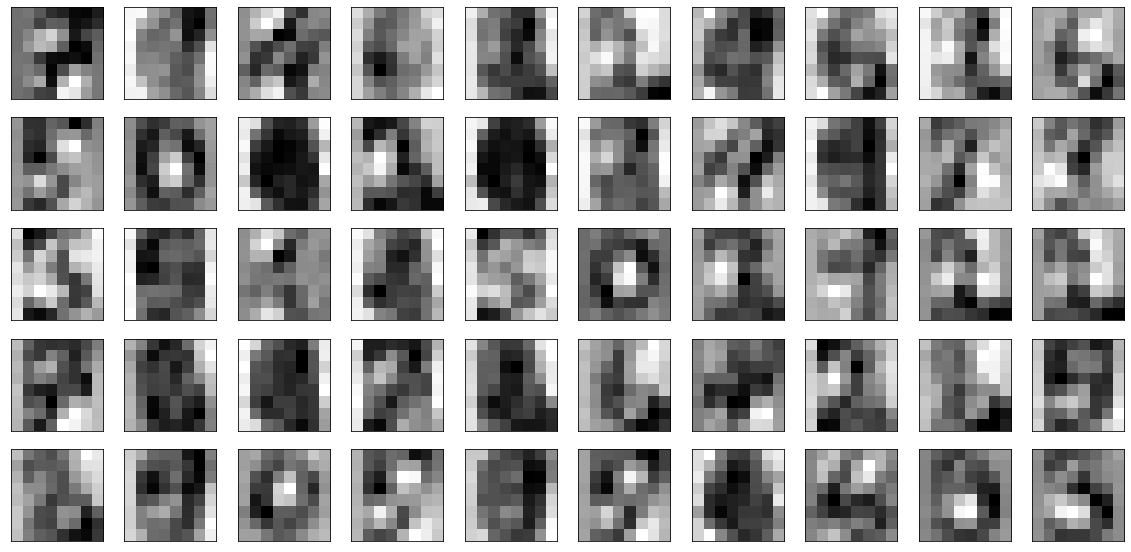

In [28]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.show()

# RBM x Sem RBM

In [29]:
previsores_rbm = classificador_rbm.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

In [36]:
print("{:.2f}%" .format(accuracy_score(previsores_rbm, y_test)*100))

88.89%


In [37]:
naive_simples = GaussianNB()
naive_simples.fit(x_train, y_train)
previsoes = naive_simples.predict(x_test)
print("{:.2f}%" .format(accuracy_score(previsoes, y_test)*100))

81.11%
